## Assignment 1 Euler-Bernoulli's beam

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker
import pandas as pd

x, L, q0, P, E, I = symbols('x L q0 P E I')

w = Function('w')(x) # w is a function of x

diffeq1 = Eq(E*I * diff(w, x, 4), q0)

w = dsolve(diffeq1, w).rhs

M = -E*I*w.diff(x, 2)

#C1, C2, C3, C4 = symbols('C1 C2 C3 C4')

# Boundary conditions for distributed load
boundary_conditions1 = [ w.subs(x, 0),                          #w(0) = 0
                        w.diff(x).subs(x, 0),                   #w'(0) = 0
                        M.subs(x, L),                           #w''(L) = 0
                        w.diff(x,3).subs(x, L) - P/(-E*I)]      #w'''(L) = -P

integration_constants = solve(boundary_conditions1, 'C1, C2, C3, C4', real=True)

display(integration_constants)

solution = w.subs(integration_constants)

display(simplify(solution))

w_func = lambdify((x, L, q0, P, E, I), solution, 'numpy')

# Create moment function with constants substituted
M_solution = M.subs(integration_constants)
M_func = lambdify((x, L, q0, P, E, I), M_solution, 'numpy')


# Numerical values
L1 = 3; L2 = 0.3

L=L1
E=220e9
b=h=0.05
I = b*h**3/12; #moment of inertia
rho = 7800; #density
g = 9.81
m = 130
P = -m*g
poisson = 0.3
q0 = -h*b*rho*g

x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I)

# Computing stresses at z = -h/2
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress

# Finding maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]

# Creating figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Deflection
plot_data_1 = w_vals*1e3
min_val_1 = np.min(plot_data_1)
max_val_1 = np.max(plot_data_1)
padding_1 = (max_val_1 - min_val_1) * 0.05
if padding_1 == 0:
    padding_1 = np.abs(max_val_1) * 0.1 if max_val_1 != 0 else 1

ax1.plot(x_vals, plot_data_1, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection, L={L}m  (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)
ax1.set_ylim(min_val_1 - padding_1, max_val_1 + padding_1)

# Saving data to .csv file
# Convert deflection to mm
w_mm = w_vals * 1e3

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Deflection (mm)': w_mm
})

# Save to CSV
df.to_csv('beam_deflection_euler_3m.csv', index=False)

print("Data saved to 'beam_deflection.csv'")

# Plot 2: Normal stress σ_xx
plot_data_2 = sigma_xx/1e6
min_val_2 = np.min(plot_data_2)
max_val_2 = np.max(plot_data_2)
padding_2 = (max_val_2 - min_val_2) * 0.05
if padding_2 == 0:
    padding_2 = np.abs(max_val_2) * 0.1 if max_val_2 != 0 else 1
    
ax2.plot(x_vals, plot_data_2, 'r-', linewidth=2)
ax2.set_title(f'Normal Stress σ_xx at z=-h/2, L={L}m (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xlim(0, L)
ax2.set_ylim(min_val_2 - padding_2, max_val_2 + padding_2)


## Saving plot data into a .csv file
# Convert stress to MPa
sigma_MPa = sigma_xx / 1e6

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Normal Stress (MPa)': sigma_MPa
})

# Save to CSV
df.to_csv('normal_stress_euler_3m.csv', index=False)

print("Data saved to 'normal_stress.csv'")

# Von Mises stress
plot_data_3 = sigma_vM/1e6
min_val_3 = np.min(plot_data_3)
max_val_3 = np.max(plot_data_3)
padding_3 = (max_val_3 - min_val_3) * 0.05
if padding_3 == 0:
    padding_3 = np.abs(max_val_3) * 0.1 if max_val_3 != 0 else 1
    
ax3.plot(x_vals, plot_data_3, 'g-', linewidth=2)
ax3.set_title(f'Von Mises Effective Stress σ_vM at z=-h/2, L={L}m (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, L)
ax3.set_ylim(min_val_3 - padding_3, max_val_3 + padding_3)

plt.tight_layout()
plt.show()


##################################################################################

L=L2

##################################################################################


x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I)

# Compute stresses at z = -h/2
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Deflection
plot_data_1 = w_vals*1e3
min_val_1 = np.min(plot_data_1)
max_val_1 = np.max(plot_data_1)
padding_1 = (max_val_1 - min_val_1) * 0.05
if padding_1 == 0:
    padding_1 = np.abs(max_val_1) * 0.1 if max_val_1 != 0 else 1

ax1.plot(x_vals, plot_data_1, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection, L={L}m (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)
ax1.set_ylim(min_val_1 - padding_1, max_val_1 + padding_1)

## Saving plot data into a .csv file
# Convert deflection to mm
w_mm = w_vals * 1e3

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Deflection (mm)': w_mm
})

# Save to CSV
df.to_csv('beam_deflection_euler_0.3m.csv', index=False)
print("Data saved to 'beam_deflection.csv'")

# Normal stress σ_xx
plot_data_2 = sigma_xx/1e6
min_val_2 = np.min(plot_data_2)
max_val_2 = np.max(plot_data_2)
padding_2 = (max_val_2 - min_val_2) * 0.05
if padding_2 == 0:
    padding_2 = np.abs(max_val_2) * 0.1 if max_val_2 != 0 else 1
    
ax2.plot(x_vals, plot_data_2, 'r-', linewidth=2)
ax2.set_title(f'Normal Stress σ_xx at z=-h/2, L={L}m (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xlim(0, L)
ax2.set_ylim(min_val_2 - padding_2, max_val_2 + padding_2)


## Saving plot data into a .csv file
# Convert stress to MPa
sigma_MPa = sigma_xx / 1e6

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Normal Stress (MPa)': sigma_MPa
})

# Save to CSV
df.to_csv('normal_stress_euler_0.3m.csv', index=False)

print("Data saved to 'normal_stress.csv'")

# Von Mises stress
plot_data_3 = sigma_vM/1e6
min_val_3 = np.min(plot_data_3)
max_val_3 = np.max(plot_data_3)
padding_3 = (max_val_3 - min_val_3) * 0.05
if padding_3 == 0:
    padding_3 = np.abs(max_val_3) * 0.1 if max_val_3 != 0 else 1
    
ax3.plot(x_vals, plot_data_3, 'g-', linewidth=2)
ax3.set_title(f'Von Mises Effective Stress σ_vM at z=-h/2, L={L}m (Euler-Bernoulli)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, L)
ax3.set_ylim(min_val_3 - padding_3, max_val_3 + padding_3)

plt.tight_layout()
plt.show()

## Timoshenko beam theory

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker


x, q0, E, I, Ks, G, A, L, P = symbols('x q0 E I Ks G A L P', real=True)

f_phi = Function('phi') # phi is a function of x

## Defining the differential equation in terms of phi
diffeq_phi = Eq(E*I*f_phi(x).diff(x, 3), q0)

## Solving the differential equation for phi(x) (eq. 3.35)
phi = dsolve(diffeq_phi, f_phi(x)).rhs

## Solving the differential equation for w(x) (eq. 3.36)
w = Function('w') # w is a function of x
diffeq_w = Eq(w(x).diff(x), -E*I/(G*Ks*A)*phi.diff(x,2) + phi)
w        = dsolve(diffeq_w, w(x)).rhs

## Defining boundary conditions
M = -E*I*phi.diff(x)
# Boundary conditions for distributed load
boundary_conditions = [ w.subs(x, 0),                           #w(0) = 0
                        w.diff(x).subs(x, 0),                   #w'(0) = 0
                        M.subs(x, L),                           #w''(L) = 0
                        w.diff(x,3).subs(x, L) - P/(-E*I)]      #w'''(L) = -P

## Solve for the integration constants
integration_constants = solve(boundary_conditions, 'C1, C2, C3, C4', real=True)

## Substitute the integration constants into the solution
solution1 = w.subs(integration_constants)

display(solution1)

w_func = lambdify((x, L, q0, P, E, I, Ks, A, G), solution1, 'numpy')
# Create moment function with constants substituted
M_solution = M.subs(integration_constants)
M_func = lambdify((x, L, q0, P, E, I, Ks, A, G), M_solution, 'numpy')

sigma_yield = 550e6  

# Numerical values
L1 = 3; L2 = 0.3

L=L1
E=220e9
b=h=0.05
I = b*h**3/12; #moment of inertia
rho = 7800; #density
g = 9.81
m = 130
P = -m*g
poisson = 0.3
q0 = -h*b*rho*g
Ks = 5/6
A = b*h
G = E/(2*(1+poisson)) 


x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I, A, G, Ks)

# Compute stresses at z = -h/2
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I, A, G, Ks)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress

# Finding maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]

# Creating figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Deflection
plot_data_1 = w_vals*1e3
min_val_1 = np.min(plot_data_1)
max_val_1 = np.max(plot_data_1)
padding_1 = (max_val_1 - min_val_1) * 0.05
if padding_1 == 0:
    padding_1 = np.abs(max_val_1) * 0.1 if max_val_1 != 0 else 1

ax1.plot(x_vals, plot_data_1, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection at L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)
ax1.set_ylim(min_val_1 - padding_1, max_val_1 + padding_1)

## Saving plot data into a .csv file
# Convert deflection to mm
w_mm = w_vals * 1e3

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Deflection (mm)': w_mm
})

# Save to CSV
df.to_csv('beam_deflection_timo_3m.csv', index=False)
print("Data saved to 'beam_deflection.csv'")

# Normal stress
plot_data_2 = sigma_xx/1e6
min_val_2 = np.min(plot_data_2)
max_val_2 = np.max(plot_data_2)
padding_2 = (max_val_2 - min_val_2) * 0.05
if padding_2 == 0:
    padding_2 = np.abs(max_val_2) * 0.1 if max_val_2 != 0 else 1
    
ax2.plot(x_vals, plot_data_2, 'r-', linewidth=2)
ax2.set_title(f'Normal Stress σ_xx at z=-h/2, L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xlim(0, L)
ax2.set_ylim(min_val_2 - padding_2, max_val_2 + padding_2)

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Normal Stress (MPa)': sigma_xx / 1e6
})

# Save to CSV
df.to_csv('normal_stress_timo_3m.csv', index=False)

print("Data saved to 'normal_stress.csv'")

# Von Mises stress
plot_data_3 = sigma_vM/1e6
min_val_3 = np.min(plot_data_3)
max_val_3 = np.max(plot_data_3)
padding_3 = (max_val_3 - min_val_3) * 0.05
if padding_3 == 0:
    padding_3 = np.abs(max_val_3) * 0.1 if max_val_3 != 0 else 1
    
ax3.plot(x_vals, plot_data_3, 'g-', linewidth=2)
ax3.set_title(f'Von Mises Effective Stress σ_vM at z=-h/2, L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, L)
ax3.set_ylim(min_val_3 - padding_3, max_val_3 + padding_3)

plt.tight_layout()
plt.show()


##################################################################################

L=L2

##################################################################################


x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I, A, G, Ks)

# Compute stresses at z = -h/2
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I, A, G, Ks)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]
safety_factor = sigma_yield / max_sigma_vM
will_yield = max_sigma_vM > sigma_yield

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Deflection
plot_data_1 = w_vals*1e3
min_val_1 = np.min(plot_data_1)
max_val_1 = np.max(plot_data_1)
padding_1 = (max_val_1 - min_val_1) * 0.05
if padding_1 == 0:
    padding_1 = np.abs(max_val_1) * 0.1 if max_val_1 != 0 else 1

ax1.plot(x_vals, plot_data_1, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection, L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)
ax1.set_ylim(min_val_1 - padding_1, max_val_1 + padding_1)

## Saving plot data into a .csv file
# Convert deflection to mm
w_mm = w_vals * 1e3

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Deflection (mm)': w_mm
})

# Save to CSV
df.to_csv('beam_deflection_timo_0.3m.csv', index=False)
print("Data saved to 'beam_deflection.csv'")

# Normal stress
plot_data_2 = sigma_xx/1e6
min_val_2 = np.min(plot_data_2)
max_val_2 = np.max(plot_data_2)
padding_2 = (max_val_2 - min_val_2) * 0.05
if padding_2 == 0:
    padding_2 = np.abs(max_val_2) * 0.1 if max_val_2 != 0 else 1
    
ax2.plot(x_vals, plot_data_2, 'r-', linewidth=2)
ax2.set_title(f'Normal Stress σ_xx at z=-h/2, L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xlim(0, L)
ax2.set_ylim(min_val_2 - padding_2, max_val_2 + padding_2)

# Create a DataFrame
df = pd.DataFrame({
    'Position (m)': x_vals,
    'Normal Stress (MPa)': sigma_xx / 1e6
})

# Save to CSV
df.to_csv('normal_stress_timo_0.3m.csv', index=False)

print("Data saved to 'normal_stress.csv'")

# Plot 3: von Mises stress
plot_data_3 = sigma_vM/1e6
min_val_3 = np.min(plot_data_3)
max_val_3 = np.max(plot_data_3)
padding_3 = (max_val_3 - min_val_3) * 0.05
if padding_3 == 0:
    padding_3 = np.abs(max_val_3) * 0.1 if max_val_3 != 0 else 1
    
ax3.plot(x_vals, plot_data_3, 'g-', linewidth=2)
ax3.set_title(f'Von Mises Effective Stress σ_vM at z=-h/2, L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, L)
ax3.set_ylim(min_val_3 - padding_3, max_val_3 + padding_3)

plt.tight_layout()
plt.show()

## Calfem with length 3m

'Ex'

array([[0.  , 0.03, 0.03, 0.  ],
       [0.03, 0.06, 0.06, 0.03],
       [0.06, 0.09, 0.09, 0.06],
       ...,
       [2.91, 2.94, 2.94, 2.91],
       [2.94, 2.97, 2.97, 2.94],
       [2.97, 3.  , 3.  , 2.97]])

'Ey'

array([[0.    , 0.    , 0.0025, 0.0025],
       [0.    , 0.    , 0.0025, 0.0025],
       [0.    , 0.    , 0.0025, 0.0025],
       ...,
       [0.0475, 0.0475, 0.05  , 0.05  ],
       [0.0475, 0.0475, 0.05  , 0.05  ],
       [0.0475, 0.0475, 0.05  , 0.05  ]])

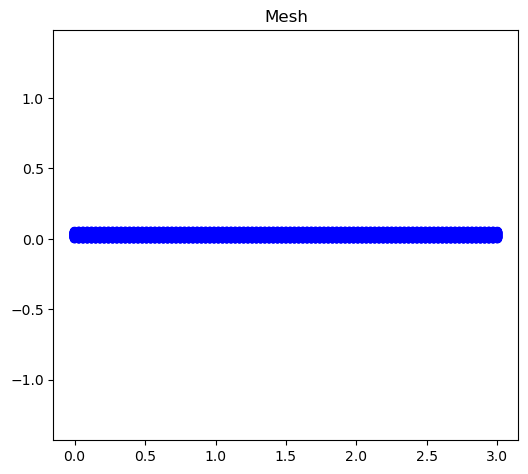

array([ 201,  202,  403,  404,  605,  606,  807,  808, 1009, 1010, 1211,
       1212, 1413, 1414, 1615, 1616, 1817, 1818, 2019, 2020, 2221, 2222,
       2423, 2424, 2625, 2626, 2827, 2828, 3029, 3030, 3231, 3232, 3433,
       3434, 3635, 3636, 3837, 3838, 4039, 4040, 4241, 4242], dtype=int32)

Total distributed load: -573.89 N
Point load: -1275.30 N
Total load: -1849.18 N

Maximum displacement: -9.688370e-02 m
Maximum displacement (mm): -96.8837 mm


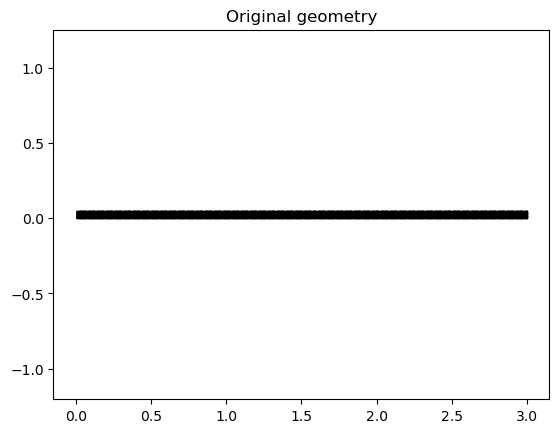

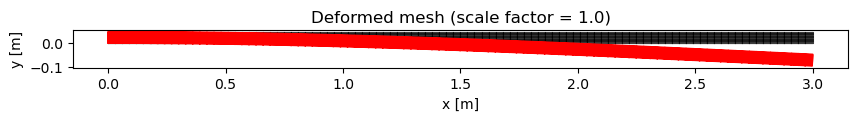

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data saved to 'total_normal_stress.csv'


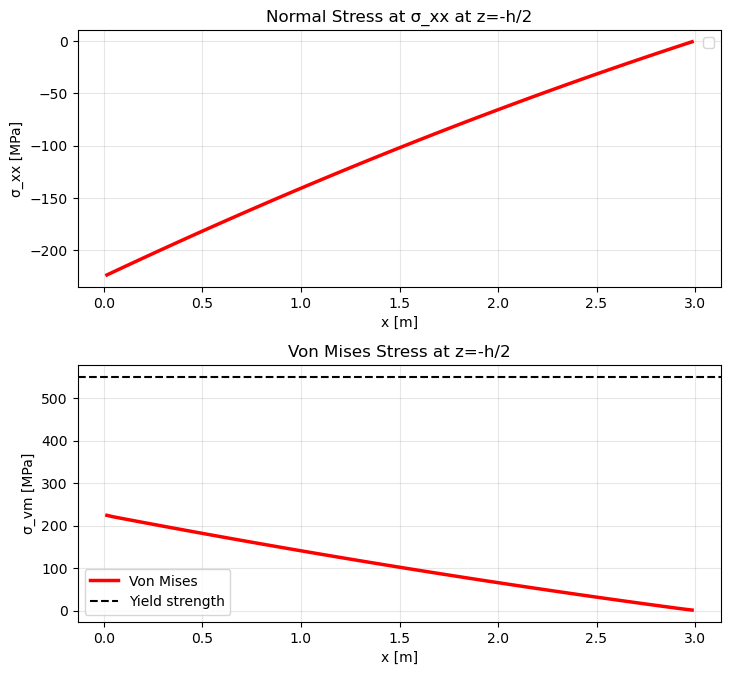

In [3]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt
# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  
q0 = -h * b * rho * g  

# Creating mesh
p1 = np.array([0., 0.])
p2 = np.array([L1, h])
nelx = 100
nely = 20
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generating mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

display('Ex', Ex)
display('Ey', Ey)

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()

display(B2)


# Initializing global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemble stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)


# Top edge elements are those in the top row
top_elements = range(nelx * (nely - 1), nelx * nely)


# Aplying distributed load along the top edge downwards
top_elements = range(nelx * (nely - 1), nelx * nely)

for el_idx in top_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)

    nodal_force = q0 * edge_length / 2.0

    # Applying the force to f vector
    f[eltopo[5] - 1] += nodal_force  
    f[eltopo[7] - 1] += nodal_force  


# Applying distributed load along the right edge
right_elements = range(nelx - 1, nelx * nely, nelx)

# Distributed load along right edge:
q_right = P / h

for el_idx in right_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    edge_length = np.sqrt((elx[1] - elx[2])**2 + (ely[1] - ely[2])**2)

    nodal_force = q_right * edge_length / 2.0

    # Apply to right edge noddes
    f[eltopo[3] - 1] += nodal_force
    f[eltopo[5] - 1] += nodal_force  


print(f"Total distributed load: {q0 * L1:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L1 + P:.2f} N")

# Applying boundary conditions 
bc = B4
bcval = np.zeros(np.size(bc))

# Solving the equation to find deformation
a, r = cfc.solveq(K, f, bc, bcval)

# Extracting displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# Deformations
plt.figure()
plotpar = [2, 1, 0] 
cfv.eldraw2(Ex, Ey, plotpar)  # Plotting the original geometry
plt.title('Original geometry')
# Drawing the deformed structure
#sfac = cfv.scalfact2(Ex[2, :], Ey[2, :], Ed[2, :], 1)
#plotpar = [1, 2, 1]
#sfac = 40  # Scaling factor to see the actual deformations
#cfv.eldisp2(Ex, Ey, Ed, plotpar, sfac)
#plt.title('Displacement')


xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])

# Deformed coordinates
U = a[0::2].reshape(-1, 1)
V = a[1::2].reshape(-1, 1)

sfac = 1  # deformation scale
coords_def = coords + sfac * np.hstack([U, V])

# Plot
plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.8, alpha=0.5)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()



# Initialize arrays to store stresses
num_elements = len(Ex)
stress_xx_membrane = np.zeros(num_elements)
stress_xx_bending = np.zeros(num_elements)
stress_xx_total = np.zeros(num_elements)
stress_yy = np.zeros(num_elements)
stress_xy = np.zeros(num_elements)
von_mises = np.zeros(num_elements)

# z-coordinate
z_eval = -h / 2.0

# Cross-sectional properties, I
I = (b * h**3) / 12.0

elem_x_center = np.zeros(num_elements)

# Loopign through all elements
for el_idx, (eltopo, elx, ely) in enumerate(zip(Edof, Ex, Ey)):
    ed = Ed[el_idx, :]
    
    # Computing stresses
    es, et = cfc.planqs(elx, ely, ep, Dmat, ed)
    
    stress_xx_membrane[el_idx] = es[0]
    stress_yy[el_idx] = es[1]
    stress_xy[el_idx] = es[2]
    
    elem_x_center[el_idx] = np.mean(elx)
    x_pos = elem_x_center[el_idx]
    
    # Bending moment M(x)
    M_x = -q0 * (L1 - x_pos)**2 / 2.0 - P * (L1 - x_pos)
    
    # Bending stress at z = -h/2
    stress_xx_bending[el_idx] = M_x * z_eval / I
    
    # Total normal stress
    stress_xx_total[el_idx] = stress_xx_membrane[el_idx] + stress_xx_bending[el_idx]
    
    # Von Mises stress
    von_mises[el_idx] = np.sqrt(
        stress_xx_total[el_idx]**2 - 
        stress_xx_total[el_idx] * stress_yy[el_idx] + 
        stress_yy[el_idx]**2 + 
        3 * stress_xy[el_idx]**2
    )

# Sorting all arrays by x-coordinate for proper plotting
sort_idx = np.argsort(elem_x_center)
x_sorted = elem_x_center[sort_idx]
stress_xx_membrane_sorted = stress_xx_membrane[sort_idx]
stress_xx_bending_sorted = stress_xx_bending[sort_idx]
stress_xx_total_sorted = stress_xx_total[sort_idx]
stress_yy_sorted = stress_yy[sort_idx]
stress_xy_sorted = stress_xy[sort_idx]
von_mises_sorted = von_mises[sort_idx]


x_unique = np.unique(x_sorted)
n_x = len(x_unique)

stress_xx_mem_avg = np.zeros(n_x)
stress_xx_bend_avg = np.zeros(n_x)
stress_xx_tot_avg = np.zeros(n_x)
stress_yy_avg = np.zeros(n_x)
stress_xy_avg = np.zeros(n_x)
von_mises_avg = np.zeros(n_x)

for i, x_val in enumerate(x_unique):
    mask = np.abs(x_sorted - x_val) < 1e-10
    stress_xx_mem_avg[i] = np.mean(stress_xx_membrane_sorted[mask])
    stress_xx_bend_avg[i] = np.mean(stress_xx_bending_sorted[mask])
    stress_xx_tot_avg[i] = np.mean(stress_xx_total_sorted[mask])
    stress_yy_avg[i] = np.mean(stress_yy_sorted[mask])
    stress_xy_avg[i] = np.mean(stress_xy_sorted[mask])
    von_mises_avg[i] = np.mean(von_mises_sorted[mask])


# Ploting
plt.figure(figsize=(14, 10))

# Normal stress
plt.subplot(3, 2, 3)
plt.plot(x_unique, stress_xx_tot_avg/1e6, 'r-', linewidth=2.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x [m]')
plt.ylabel('σ_xx [MPa]')
plt.title(f'Normal Stress at σ_xx at z=-h/2')
plt.legend()

# Convert stress to MPa
sigma_MPa = stress_xx_tot_avg / 1e6

# Create DataFrame
df = pd.DataFrame({
    'Position (m)': x_unique,
    'Normal Stress (MPa)': sigma_MPa
})

# Save to CSV
df.to_csv('normal_stress_calfem_L=3m.csv', index=False)

print("Data saved to 'total_normal_stress.csv'")

# Von mises
plt.subplot(3, 2, 5)
plt.plot(x_unique, von_mises_avg/1e6, 'r-', linewidth=2.5, label='Von Mises')
plt.axhline(y=sigma_yield/1e6, color='k', linestyle='--', linewidth=1.5, label='Yield strength')
plt.grid(True, alpha=0.3)
plt.xlabel('x [m]')
plt.ylabel('σ_vm [MPa]')
plt.title(f'Von Mises Stress at z=-h/2')
plt.legend()

plt.tight_layout()
plt.show()

## Calfem with length 0.3m

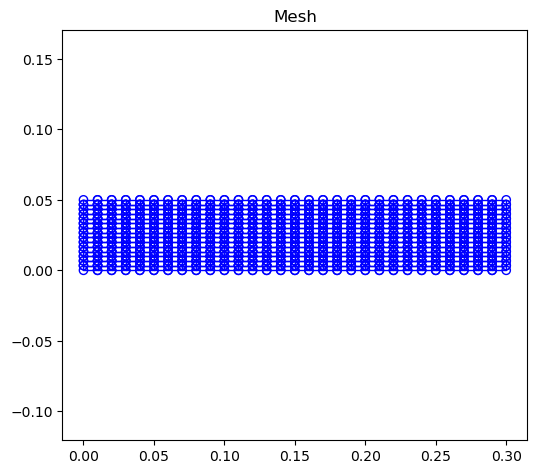

Total distributed load: -57.39 N
Point load: -1275.30 N
Total load: -1332.69 N

Maximum displacement: -1.012989e-04 m
Maximum displacement (mm): -0.1013 mm


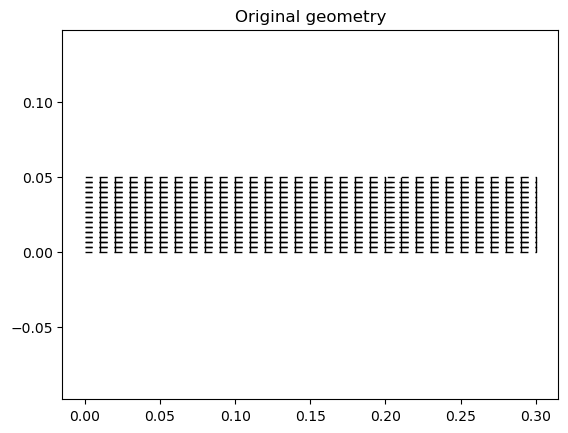

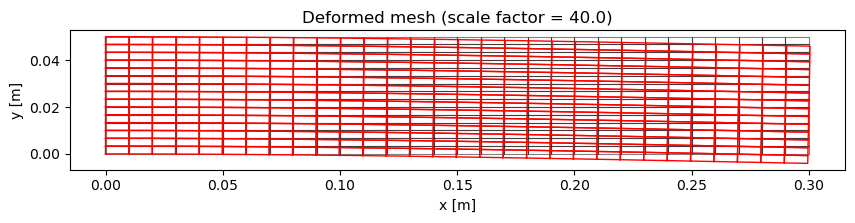

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Data saved to 'total_normal_stress.csv'


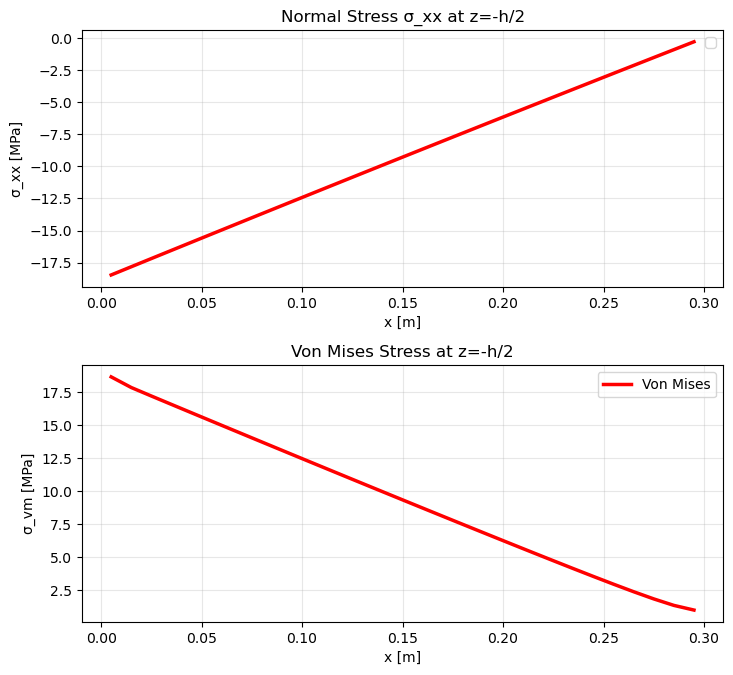

In [5]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt
import pandas as pd

# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  # Point load
q0 = -h * b * rho * g  # Distributed load

# Create mesh
p1 = np.array([0., 0.])  # Lower left corner
p2 = np.array([L2, h])   # Upper right corner
nelx = 30
nely = 15
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generate mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

#display('Ex', Ex)
#display('Ey', Ey)

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()



# Initializing global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemblying the stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)


top_elements = range(nelx * (nely - 1), nelx * nely)


# Applying distributed load along the top edge
top_elements = range(nelx * (nely - 1), nelx * nely)

for el_idx in top_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)

    nodal_force = q0 * edge_length / 2.0

    # Applying to Y-DOFs
    f[eltopo[5] - 1] += nodal_force  
    f[eltopo[7] - 1] += nodal_force  


# Applying distributed load along the right edge
right_elements = range(nelx - 1, nelx * nely, nelx)

# Distributed load force
q_right = P / h   

for el_idx in right_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    edge_length = np.sqrt((elx[1] - elx[2])**2 + (ely[1] - ely[2])**2)

    nodal_force = q_right * edge_length / 2.0

    # Apply to to right edge nodes in y-direction
    f[eltopo[3] - 1] += nodal_force  
    f[eltopo[5] - 1] += nodal_force  


print(f"Total distributed load: {q0 * L2:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L2 + P:.2f} N")

# Applying boundary conditions
bc = B4
bcval = np.zeros(np.size(bc))

# Solving the system
a, r = cfc.solveq(K, f, bc, bcval)

# Extracting displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# Deformations
plt.figure()
plotpar = [2, 1, 0]  # Plotting parameters
cfv.eldraw2(Ex, Ey, plotpar)  # Plotting the original geometry
plt.title('Original geometry')
# Drawing the deformed structure
#sfac = cfv.scalfact2(Ex[2, :], Ey[2, :], Ed[2, :], 1)
#plotpar = [1, 2, 1]
#sfac = 40  # Scaling factor to see the actual deformations
#cfv.eldisp2(Ex, Ey, Ed, plotpar, sfac)
#plt.title('Displacement')


# Computing nodal coordinates
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])

# Deformed coordinates
U = a[0::2].reshape(-1, 1)  # x-displacements
V = a[1::2].reshape(-1, 1)  # y-displacements

sfac = 40  # deformation scale
coords_def = coords + sfac * np.hstack([U, V])


plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    # Undeformed
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.8, alpha=0.5)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    # Geting the deformed coordinates for each element
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()


sigma_yield = 550e6
# Initialize arrays to store stresses
num_elements = len(Ex)
stress_xx_membrane = np.zeros(num_elements)
stress_xx_bending = np.zeros(num_elements)
stress_xx_total = np.zeros(num_elements)
stress_yy = np.zeros(num_elements)
stress_xy = np.zeros(num_elements)
von_mises = np.zeros(num_elements)

# z-coordinate 
z_eval = -h / 2.0

# Cross section I properties
I = (b * h**3) / 12.0

# Element center x-coordinates
elem_x_center = np.zeros(num_elements)

# Looping through all elements
for el_idx, (eltopo, elx, ely) in enumerate(zip(Edof, Ex, Ey)):
    ed = Ed[el_idx, :]
    
    # Compute stresses 
    es, et = cfc.planqs(elx, ely, ep, Dmat, ed)
    
    stress_xx_membrane[el_idx] = es[0]
    stress_yy[el_idx] = es[1]
    stress_xy[el_idx] = es[2]
    
    # Element center x-coordinate
    elem_x_center[el_idx] = np.mean(elx)
    x_pos = elem_x_center[el_idx]
    
    # Bending moment M(x)
    M_x = -q0 * (L2 - x_pos)**2 / 2.0 - P * (L2 - x_pos)
    
    # Bending stress at z = -h/2
    stress_xx_bending[el_idx] = M_x * z_eval / I
    
    # Total normal stress
    stress_xx_total[el_idx] = stress_xx_membrane[el_idx] + stress_xx_bending[el_idx]
    
    # Von Mises stress
    von_mises[el_idx] = np.sqrt(
        stress_xx_total[el_idx]**2 - 
        stress_xx_total[el_idx] * stress_yy[el_idx] + 
        stress_yy[el_idx]**2 + 
        3 * stress_xy[el_idx]**2
    )

# Sorting all arrays by x-coordinate for proper plotting
sort_idx = np.argsort(elem_x_center)
x_sorted = elem_x_center[sort_idx]
stress_xx_membrane_sorted = stress_xx_membrane[sort_idx]
stress_xx_bending_sorted = stress_xx_bending[sort_idx]
stress_xx_total_sorted = stress_xx_total[sort_idx]
stress_yy_sorted = stress_yy[sort_idx]
stress_xy_sorted = stress_xy[sort_idx]
von_mises_sorted = von_mises[sort_idx]


x_unique = np.unique(x_sorted)
n_x = len(x_unique)

stress_xx_mem_avg = np.zeros(n_x)
stress_xx_bend_avg = np.zeros(n_x)
stress_xx_tot_avg = np.zeros(n_x)
stress_yy_avg = np.zeros(n_x)
stress_xy_avg = np.zeros(n_x)
von_mises_avg = np.zeros(n_x)

for i, x_val in enumerate(x_unique):
    mask = np.abs(x_sorted - x_val) < 1e-10
    stress_xx_mem_avg[i] = np.mean(stress_xx_membrane_sorted[mask])
    stress_xx_bend_avg[i] = np.mean(stress_xx_bending_sorted[mask])
    stress_xx_tot_avg[i] = np.mean(stress_xx_total_sorted[mask])
    stress_yy_avg[i] = np.mean(stress_yy_sorted[mask])
    stress_xy_avg[i] = np.mean(stress_xy_sorted[mask])
    von_mises_avg[i] = np.mean(von_mises_sorted[mask])


plt.figure(figsize=(14, 10))

# Normal stress
plt.subplot(3, 2, 3)
plt.plot(x_unique, stress_xx_tot_avg/1e6, 'r-', linewidth=2.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x [m]')
plt.ylabel('σ_xx [MPa]')
plt.title(f'Normal Stress σ_xx at z=-h/2')
plt.legend()

# Converting to Pa to MPa
sigma_MPa = stress_xx_tot_avg / 1e6

# Create DataFrame
df = pd.DataFrame({
    'Position (m)': x_unique,
    'Normal Stress (MPa)': sigma_MPa
})

# Save to CSV
df.to_csv('normal_stress_calfem_L=0.3m.csv', index=False)

print("Data saved to 'total_normal_stress.csv'")

# Von Mises stress
plt.subplot(3, 2, 5)
plt.plot(x_unique, von_mises_avg/1e6, 'r-', linewidth=2.5, label='Von Mises')
plt.grid(True, alpha=0.3)
plt.xlabel('x [m]')
plt.ylabel('σ_vm [MPa]')
plt.title(f'Von Mises Stress at z=-h/2')
plt.legend()

plt.tight_layout()
plt.show()


## Assignment 2 constant thickness

In [ ]:
import numpy as np
import calfem.core as cfc
import matplotlib.pyplot as plt
from scipy import integrate
from sympy import *
import sympy as sp
from IPython.display import display
import matplotlib.ticker as ticker

# Plot parameters
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.axisbelow"] = "True"
size_in_inch = (22.0/2.54, 14/2.54)  # Convert cm to inches

b_outer = 0.25
nu=0.3
E=200e9
h0 = 0.02
Width = b_outer
num_el = 10
nnodes = num_el + 1
a_inner = 0.15

coords = np.linspace(a_inner, b_outer, nnodes) # Creating coordinate system

# Symbols
r_sym, r1_sym, r2_sym = symbols('r r1 r2', real=True)

# Defining shape functions
Ne1 = (r2_sym - r_sym) / (r2_sym - r1_sym)
Ne2 = (r_sym - r1_sym) / (r2_sym - r1_sym)

# Defining Be using sympy
Be_sym = Matrix([
    [diff(Ne1, r_sym), diff(Ne2, r_sym)],
    [Ne1 / r_sym, Ne2 / r_sym]
])

# Creating a numeric function for Be
Be_numeric_func = lambdify([r_sym, r1_sym, r2_sym], Be_sym, 'numpy')

Edof = np.zeros((num_el, 2), dtype=int)
for i in range(num_el):
    Edof[i, 0] = i + 1       
    Edof[i, 1] = i + 2       

display(Edof)

num_dofs = np.max(Edof)

D = E / (1-nu**2) * np.array([[1, nu],
                                 [nu,1]])

num_dofs = np.max(Edof)
K = np.zeros((num_dofs, num_dofs))
f = np.zeros((num_dofs, 1))

print("K shape:", K.shape)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_avg = (r1+r2)/2
    Be_center = Be_numeric_func(r_avg, r1, r2)
    
    # Constant thickness
    h_e = h0
    
    # Creating local stiffness matrix
    Ke = Le * 2 * np.pi * h_e * r_avg * Be_center.T @ D @ Be_center

    cfc.assem(Edof[el, :], K, Ke)

# BC
bc = np.array([1])  # Inner edge fixed
bcVal = np.array([0.0])

# Applying force
sigma_r = 120e6 
r_outer = coords[-1]
h_inner = h0
f[-1, 0] = -2 * np.pi * r_outer * h_inner * sigma_r  # Applying force on outer edge


a, r = cfc.solveq(K, f, bc, bcVal)


# Displacement plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)

# Using smaller markers due to high num_el
ax.plot(coords, a * 1e3, color="b", marker="o", markersize=2, linestyle="-", linewidth=1, label='$u_r(r)$ [mm]') # Converting m to mm
ax.set_xlabel(r'$r$ [m]')
ax.set_ylabel('Radial displacement [mm]')
ax.set_title(r'Axisymmetric radial displacement of disc (constant $h$)') 

# Formatting
ax.set_xticks(np.linspace(a_inner, b_outer, 6))
ax.tick_params(which="both", direction="in")
ax.grid(True)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)
ax.legend()
fig.tight_layout()
plt.show()


for i in range(nnodes):
    print(f"Node {i+1}: r = {coords[i]:.4f} m, ur = {a[i,0]*1e6:.3f} μm")

# Computing normal stress
sigma_rr_vals = np.zeros(num_el)
r_centers = np.zeros(num_el)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    r_centers[el] = r_mean

    # Displcement for each element
    dof1 = Edof[el, 0] - 1
    dof2 = Edof[el, 1] - 1
    u1 = a[dof1, 0]
    u2 = a[dof2, 0]
    
    du_dr = (u2 - u1) / Le

    sigma_rr = E / (1 - nu**2) * (du_dr + nu * (u1 + u2) / (2 * r_mean))
    sigma_rr_vals[el] = sigma_rr


# Stress distribution plot
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)

# Looping over each element
for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    
    # Plotting a line for each element
    ax2.plot([r1, r2], [sigma_rr_vals[el]/1e6, sigma_rr_vals[el]/1e6], 'r-',
             linewidth=1, markersize=0)

# Setting labels
ax2.set_xlabel(r'$r$ [m]')
ax2.set_ylabel(r'$\sigma_{rr}$ [MPa]')
ax2.set_title(r'Radial stress distribution $\sigma_{rr}(r)$ (constant $h$)')

# Formatting
ax2.set_xticks(np.linspace(a_inner, b_outer, 6))
ax2.tick_params(which="both", direction="in")
ax2.grid(True)
formatter2 = ticker.ScalarFormatter(useMathText=True)
formatter2.set_powerlimits((0, 0))
ax2.yaxis.set_major_formatter(formatter2)
fig2.tight_layout()
plt.show()

## Assignment 2 varying thickness

In [ ]:
import numpy as np
import calfem.core as cfc
import matplotlib.pyplot as plt
from scipy import integrate
from IPython.display import display
from sympy import *
import sympy as sp
import matplotlib.ticker as ticker

b_outer = 0.25
nu=0.3
E=200e9
h0 = 0.02
Width = b_outer
num_el = 10
nnodes = num_el + 1
a_inner = 0.15

# Plot parameters
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["axes.axisbelow"] = "True"
size_in_inch = (22.0/2.54, 14/2.54)  # Convert cm to inches

coords = np.linspace(a_inner, b_outer, nnodes) # Creating coordinate system

# Symbols
r_sym, r1_sym, r2_sym = symbols('r r1 r2', real=True)

# Defining shape functions
Ne1 = (r2_sym - r_sym) / (r2_sym - r1_sym)
Ne2 = (r_sym - r1_sym) / (r2_sym - r1_sym)

# Defining Be using sympy
Be_sym = Matrix([
    [diff(Ne1, r_sym), diff(Ne2, r_sym)],
    [Ne1 / r_sym, Ne2 / r_sym]
])


# Creating a numeric function for Be
Be_numeric_func = lambdify([r_sym, r1_sym, r2_sym], Be_sym, 'numpy')

#display(coords)
#coords = coords.reshape(-1,1)

Edof = np.zeros((num_el, 2), dtype=int)
for i in range(num_el):
    Edof[i, 0] = i + 1       
    Edof[i, 1] = i + 2       


num_dofs = np.max(Edof)

D = E / (1-nu**2) * np.array([[1, nu],
                                 [nu,1]])

num_dofs = np.max(Edof)
K = np.zeros((num_dofs, num_dofs))
f = np.zeros((num_dofs, 1))

print("K shape:", K.shape)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_avg = (r1+r2)/2

    Be_center = Be_numeric_func(r_avg, r1, r2)
    
    # variable thickness
    h_e = h0 * (r_avg - a_inner) / (b_outer - a_inner) + h0

    print('h_e',np.shape(h_e))
    print('r_mean',np.shape(r_mean))

    # Creating local stiffness matrix
    Ke = Le * 2 * np.pi * h_e * r_avg * Be_center.T @ D @ Be_center

    cfc.assem(Edof[el, :], K, Ke)

# BC
bc = np.array([1])  # Inner edge fixed
bcVal = np.array([0.0])

# Applying force
sigma_r = -120e6 
r_outer = coords[-1]

# Defining the varying thickness function
h_varying_func = lambda r: h0 * (r - a_inner) / (b_outer - a_inner) + h0

# Calculating the thcikness of the outer edge
h_at_outer_edge = h_varying_func(r_outer)

# Applying negative force on outer edge
f[-1, 0] = 2 * np.pi * r_outer * h_at_outer_edge * sigma_r


a, r = cfc.solveq(K, f, bc, bcVal) # Solving equation to find displcement


# Displacement plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)

ax.plot(coords, a * 1e3, color="b", marker="o", markersize=3, linestyle="-", label='$u_r(r)$ [mm]') # Converting m to mm
ax.set_xlabel(r'$r$ [m]')
ax.set_ylabel('Radial displacement [mm]')
ax.set_title(r'Axisymmetric radial displacement of disc (varying $h$)')

# Formatting
ax.set_xticks(np.linspace(a_inner, b_outer, 6))
ax.tick_params(which="both", direction="in")
ax.grid(True)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0, 0))
ax.yaxis.set_major_formatter(formatter)
ax.legend()
fig.tight_layout()
plt.show()



for i in range(nnodes):
    print(f"Node {i+1}: r = {coords[i]:.4f} m, ur = {a[i,0]*1e6:.3f} μm")

# Computing normal stress
sigma_rr_vals = np.zeros(num_el)
r_centers = np.zeros(num_el)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    r_centers[el] = r_mean

    # Displcement for each element
    dof1 = Edof[el, 0] - 1
    dof2 = Edof[el, 1] - 1
    u1 = a[dof1, 0]
    u2 = a[dof2, 0]
    
    du_dr = (u2 - u1) / Le

    
    sigma_rr = E / (1 - nu**2) * (du_dr + nu * (u1 + u2) / (2 * r_mean))
    sigma_rr_vals[el] = sigma_rr


# Stress distribution plot
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=size_in_inch)

# Looping over each element
for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    # Plotting a line for each element
    ax2.plot([r1, r2], [sigma_rr_vals[el]/1e6, sigma_rr_vals[el]/1e6], 'ro-',
             linewidth=2, markersize=2)

# Setting labels
ax2.set_xlabel(r'$r$ [m]')
ax2.set_ylabel(r'$\sigma_{rr}$ [MPa]')
ax2.set_title(r'Radial stress distribution $\sigma_{rr}(r)$ (varying $h$)')

# Formatting
ax2.set_xticks(np.linspace(a_inner, b_outer, 6))
ax2.tick_params(which="both", direction="in")
ax2.grid(True)
formatter2 = ticker.ScalarFormatter(useMathText=True)
formatter2.set_powerlimits((0, 0))
ax2.yaxis.set_major_formatter(formatter2)
fig2.tight_layout()
plt.show()

## Mesh study assignment 1 L=3 and L=0.3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data 1 from mesh study (L=3)
data1 = [
    (2000, -96.8837),
    (3000, -107.1399),
    (3000, -96.8784),
    (3600, -102.2611),
    (3600, -109.9881),
    (4000, -111.2657),
    (4500, -107.1336),
    (5000, -113.2861),
    (6000, -114.4148),
    (7500, -113.2799),
    (8000, -115.5584),
    (10000, -116.0937),
    (12000, -116.3842),
    (13000, -116.4816)
]

# Data 2 from mesh study (L=0.3)
data2 = [
    (80, -0.0979),
    (450, -0.1013),
    (600, -0.1024),
    (750, -0.1028),
    (1500, -0.1035),
    (2000, -0.1035),
    (4000, -0.1037)
]

# Function to process data
def process_data(data):
    # Remove duplicates and sort by cells
    unique_data = {}
    for cells_val, disp_val in data:
        if cells_val not in unique_data:
            unique_data[cells_val] = disp_val
    
    # Sort by cells
    sorted_pairs = sorted(unique_data.items(), key=lambda x: x[0])
    cells_sorted = [pair[0] for pair in sorted_pairs]
    displacement_sorted = [pair[1] for pair in sorted_pairs]
    
    return cells_sorted, displacement_sorted

# Process both datasets
cells1, displacement1 = process_data(data1)
cells2, displacement2 = process_data(data2)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1
ax1.plot(cells1, displacement1, 'b-o', linewidth=2, markersize=8, label='Maximum Displacement')
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Number of Cells', fontsize=12, fontweight='bold')
ax1.set_ylabel('Maximum Displacement (mm)', fontsize=12, fontweight='bold')
ax1.set_title('Mesh Convergence Study (L = 3 m)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.ticklabel_format(style='plain', axis='x')


# Plot 2
ax2.plot(cells2, displacement2, 'r-s', linewidth=2, markersize=8, label='Maximum Displacement')
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('Number of Cells', fontsize=12, fontweight='bold')
ax2.set_ylabel('Maximum Displacement (mm)', fontsize=12, fontweight='bold')
ax2.set_title('Mesh Convergence Study (L = 0.3)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.ticklabel_format(style='plain', axis='x')


plt.tight_layout()
plt.show()